<a href="https://www.kaggle.com/code/himanshikawade04/big-mart-sales-prediction?scriptVersionId=186403679" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


## Load Dataset

In [3]:
df=pd.read_csv('/kaggle/input/big-mart-dataset/BigMart.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Know about the data

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## check the null values

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Replace null value with mean and mode

In [8]:
from statistics import mode

In [9]:

df["Item_Weight"].fillna(np.mean(df['Item_Weight']),inplace=True)
df['Outlet_Size'].fillna(mode(df['Outlet_Size']),inplace=True)


In [10]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

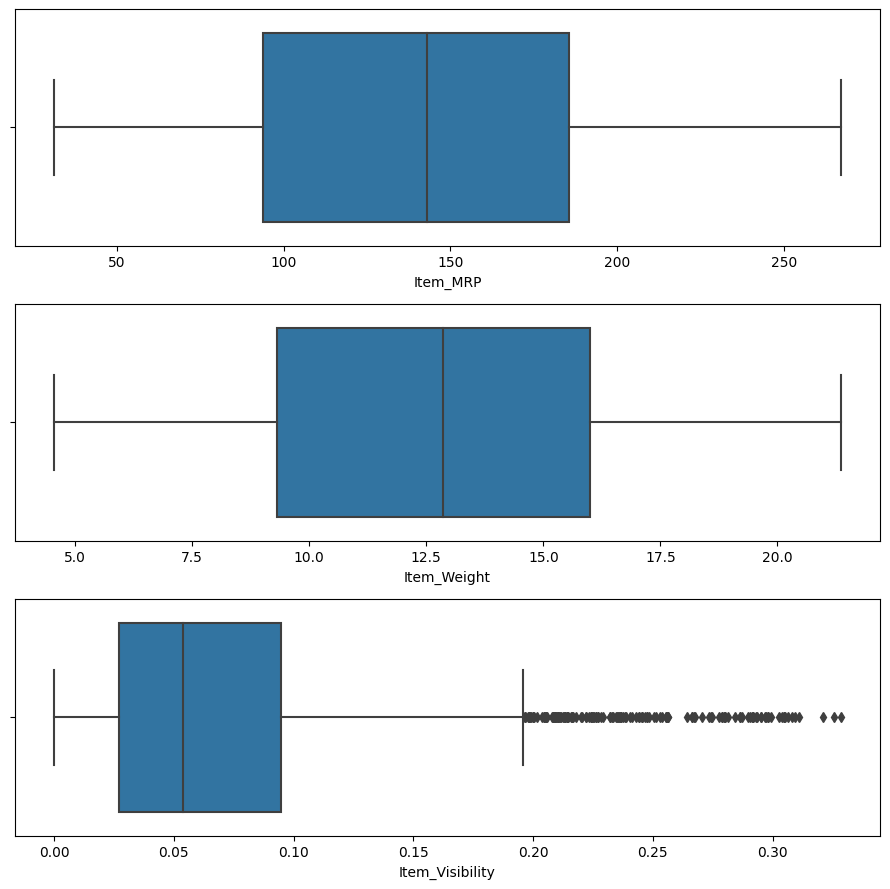

In [12]:
fig,axs=plt.subplots(3,figsize=(9,9))
plt1=sns.boxplot(x=df['Item_MRP'],ax=axs[0])
plt2=sns.boxplot(x=df['Item_Weight'],ax=axs[1])
plt3=sns.boxplot(x=df['Item_Visibility'],ax=axs[2])
plt.tight_layout()

In [13]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Type'>

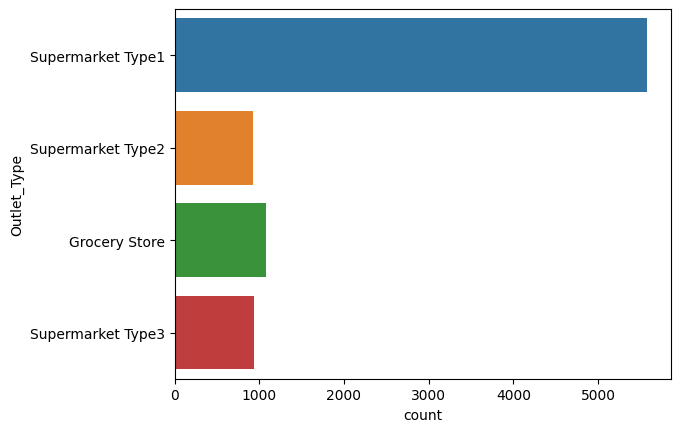

In [14]:
sns.countplot(data=df,y=df["Outlet_Type"])

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

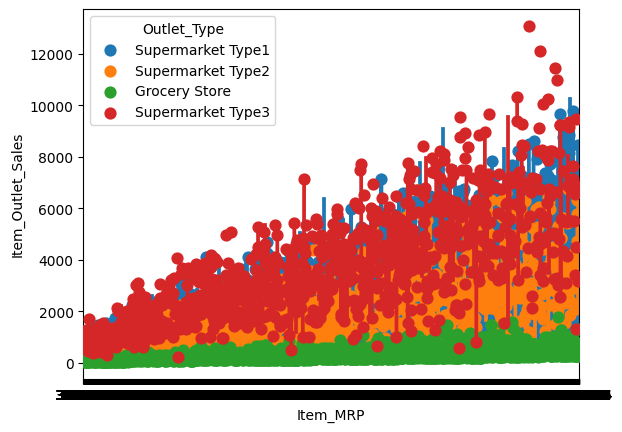

In [15]:
sns.pointplot(df,x=df['Item_MRP'],y=df['Item_Outlet_Sales'],hue='Outlet_Type')

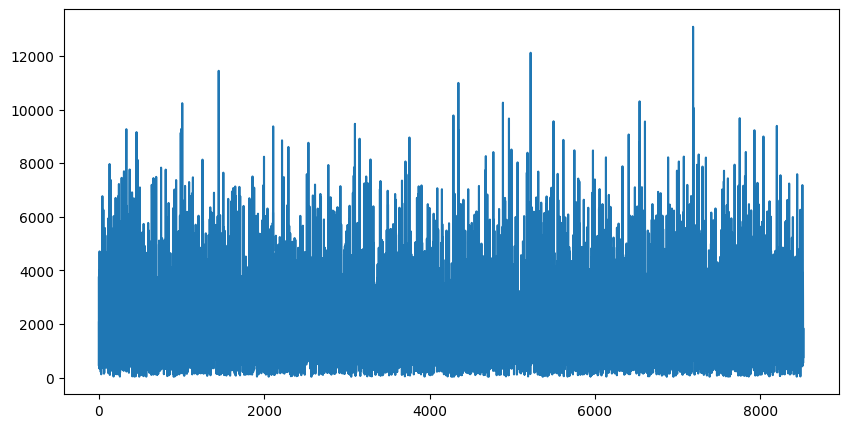

In [16]:
plt.figure(figsize=(10,5))
df['Item_Outlet_Sales'].plot(kind='line')
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Weight'>

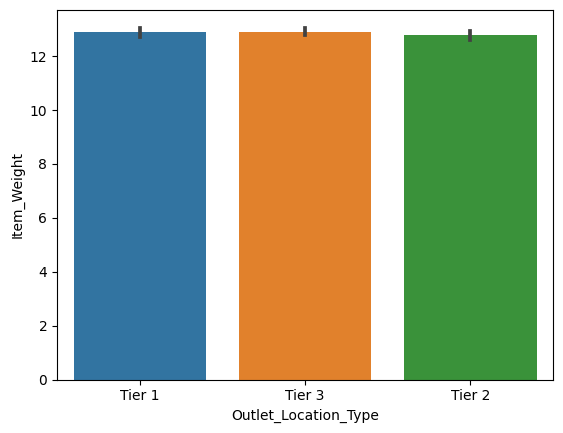

In [17]:
sns.barplot(df,x=df["Outlet_Location_Type"],y=df["Item_Weight"])

<Axes: >

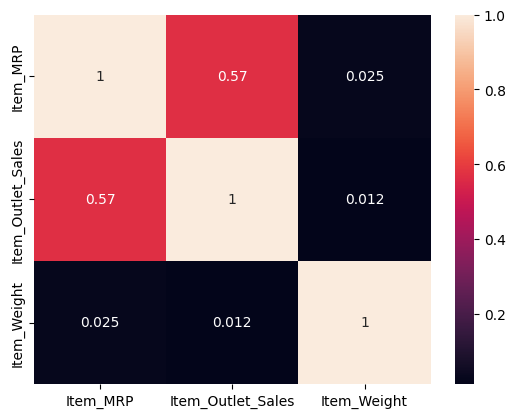

In [18]:
dfn=df[['Item_MRP','Item_Outlet_Sales','Item_Weight']]
sns.heatmap(dfn.corr(),annot=True)

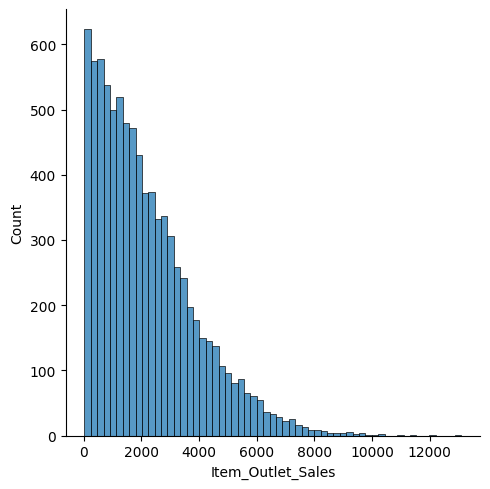

In [19]:
sns.displot(df["Item_Outlet_Sales"])

In [20]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [21]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## To convert categorical into Numerical Format

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:

enc=LabelEncoder()
df['Outlet_Location_Type']= enc.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=enc.fit_transform(df['Outlet_Type'])
df["Item_Type"]=enc.fit_transform(df['Item_Type'])
df['Outlet_Size']=enc.fit_transform(df['Outlet_Size'])
df['Item_Fat_Content']=enc.fit_transform(df['Item_Fat_Content'])


In [24]:
df['Age']=2024-df["Outlet_Establishment_Year"]
df=df.drop(df['Outlet_Establishment_Year'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8514 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8514 non-null   float64
 1   Item_Fat_Content           8514 non-null   int64  
 2   Item_Visibility            8514 non-null   float64
 3   Item_Type                  8514 non-null   int64  
 4   Item_MRP                   8514 non-null   float64
 5   Outlet_Establishment_Year  8514 non-null   int64  
 6   Outlet_Size                8514 non-null   int64  
 7   Outlet_Location_Type       8514 non-null   int64  
 8   Outlet_Type                8514 non-null   int64  
 9   Item_Outlet_Sales          8514 non-null   float64
 10  Age                        8514 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 798.2 KB


In [26]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,25
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228,15
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700,25
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800,26
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052,37


## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop(columns='Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
print("The size of the original data",X.shape)
print("the Size of the training data",X_train.shape)
print("the size of the test data",X_test.shape)

The size of the original data (8514, 10)
the Size of the training data (6811, 10)
the size of the test data (1703, 10)


In [31]:
print("The size of the original target data",y.shape)
print("the Size of the training target data",y_train.shape)
print("the size of the test  target data",y_test.shape)

The size of the original target data (8514,)
the Size of the training target data (6811,)
the size of the test  target data (1703,)


## Model Building

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Create and Fit Model
model = LinearRegression()
tree_m = DecisionTreeRegressor()

tree_m.fit(X_train,y_train)
model.fit(X_train, y_train) 

LinearRegression()

In [34]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred_tree = model.predict(X_test)

In [35]:
y_pred

array([2624., 1544., -564., ..., 2152., 1732., 3308.])

In [36]:
y_pred_tree

array([2624., 1544., -564., ..., 2152., 1732., 3308.])

In [37]:
# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)


print('Mean Squared Error (RMSE) for Reg. :', rmse)
print('Coefficient of Determination (R^2) for Reg. :', r2)

print('Mean Squared Error (RMSE) for D.T. :', rmse_tree)
print('Coefficient of Determination (R^2) for D.T. :', r2_tree)

Mean Squared Error (RMSE) for Reg. : 1146.749316324054
Coefficient of Determination (R^2) for Reg. : 0.48886508514417937
Mean Squared Error (RMSE) for D.T. : 1146.749316324054
Coefficient of Determination (R^2) for D.T. : 0.48886508514417937
